# Data Preprocessing v2

Remove observations labelled as "new_whale"

## Imports

Import libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2, glob, os, pickle
from src.preprocessing import image_load_resize

Import labels

In [3]:
labels_df = pd.read_csv('data/raw/train.csv', dtype={'Id': 'str'})
print(labels_df.head())
print(labels_df.shape)

           Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale
(25361, 2)


Number and distribution of classes

No of classes: 5005


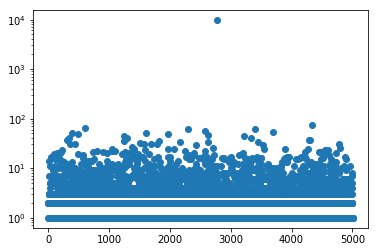

In [4]:
classes_unique = list(set(labels_df['Id']))
print('No of classes:', len(classes_unique))
class_count_list = [labels_df[labels_df['Id'] == class_id].shape[0]\
                    for class_id in classes_unique]
plt.figure()
plt.scatter(list(range(len(classes_unique))), class_count_list)
plt.xlabel('')
plt.yscale('log')
plt.show()

Import one train image

Image shape: (700, 1050, 3)


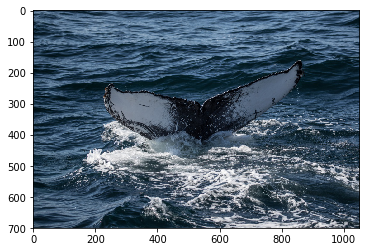

In [5]:
image = cv2.cvtColor(cv2.imread('data/raw/train/0000e88ab.jpg'), cv2.COLOR_BGR2RGB)
print('Image shape:', image.shape)
plt.imshow(image)

Resize image

Resized image shape: (224, 224, 3)


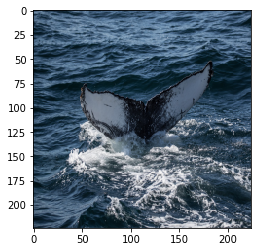

In [6]:
resize_width = 224
image_resized = cv2.resize(image, (resize_width, resize_width), interpolation=cv2.INTER_AREA)
plt.imshow(image_resized)
print('Resized image shape:', image_resized.shape)

Import training set images and convert to NumPy arrays

In [11]:
train_file_list_short = [image for image, label in zip(labels_df.Image, labels_df.Id) if label != 'new_whale']

train_file_list_original = ['data/raw/train/{}'.format(file_name) for file_name in train_file_list_short]

#train_file_list_original = glob.glob('data/raw/train/*.jpg')

print(train_file_list_short[:5])
print(len(train_file_list_short))
print(train_file_list_original[:5])
print(len(train_file_list_original))

['0000e88ab.jpg', '0001f9222.jpg', '00029d126.jpg', '000a6daec.jpg', '0016b897a.jpg']
15697
['data/raw/train/0000e88ab.jpg', 'data/raw/train/0001f9222.jpg', 'data/raw/train/00029d126.jpg', 'data/raw/train/000a6daec.jpg', 'data/raw/train/0016b897a.jpg']
15697


In [12]:
resize_width = 224
data_train_pickle_path = 'data/derived/data_train_v2.pickle'
labels_train_pickle_path = 'data/derived/labels_train_v2.pickle'
if os.path.exists(data_train_pickle_path):
    print('Path {} exists'.format(data_train_pickle_path))
else:
    data_train_list = [image_load_resize(train_file, resize_width)\
                       for train_file in train_file_list_original]
    data_train = np.stack(data_train_list)
    with open(data_train_pickle_path, 'wb') as file:
        pickle.dump(data_train, file)
if os.path.exists(labels_train_pickle_path):
    print('Path {} exists'.format(labels_train_pickle_path))
else:
    labels_train = [labels_df[labels_df['Image'] == train_file_short]['Id'].to_string(header=False, index=False)\
                   for train_file_short in train_file_list_short]
    with open(labels_train_pickle_path, 'wb') as file:
        pickle.dump(labels_train, file)
with open(data_train_pickle_path, 'rb') as file:
    data_train = pickle.load(file)
with open(labels_train_pickle_path, 'rb') as file:
    labels_train = pickle.load(file)

print('data_train:', data_train[:1])
print('Training data shape:', data_train.shape)
print('labels_train:', labels_train[:5])
print('Training labels length:', len(labels_train))

data_train: [[[[ 36  62  80]
   [ 30  56  75]
   [ 42  67  89]
   ...
   [ 64  91 115]
   [ 88 116 147]
   [ 83 110 141]]

  [[ 69  95 120]
   [ 74  99 123]
   [ 73  96 121]
   ...
   [ 21  46  68]
   [ 32  58  78]
   [ 36  61  81]]

  [[ 92 118 147]
   [105 131 159]
   [112 137 162]
   ...
   [ 52  77 104]
   [ 52  76 104]
   [ 54  78 106]]

  ...

  [[ 55  77 101]
   [ 56  78 101]
   [ 56  78 101]
   ...
   [116 124 133]
   [126 131 142]
   [115 117 129]]

  [[ 62  82 106]
   [ 57  77  99]
   [ 55  75  96]
   ...
   [ 40  51  63]
   [ 31  44  54]
   [ 34  45  56]]

  [[ 25  42  59]
   [ 19  37  53]
   [ 17  35  49]
   ...
   [ 24  41  57]
   [ 20  37  48]
   [ 28  43  54]]]]
Training data shape: (15697, 224, 224, 3)
labels_train: ['w_f48451c', 'w_c3d896a', 'w_20df2c5', 'w_dd88965', 'w_64404ac']
Training labels length: 15697


In [9]:
test_file_list_original = glob.glob('data/raw/test/*.jpg')
test_file_list_short = [test_file.replace('data/raw/test/', '')\
                         for test_file in test_file_list_original]
if os.path.exists('data/derived/test_file_names.pickle'):
    print('Path {} exists'.format('data/derived/test_file_names.pickle'))
else:
    with open('data/derived/test_file_names.pickle', 'wb') as file:
        pickle.dump(test_file_list_short, file)
print(test_file_list_short[:5])

['c303faac6.jpg', '96c2b7290.jpg', '69f6cd44f.jpg', 'a965dea33.jpg', '9a225e056.jpg']


In [10]:
resize_width = 224
data_test_pickle_path = 'data/derived/data_test.pickle'
if os.path.exists(data_test_pickle_path):
    print('Path {} exists'.format(data_test_pickle_path))
else:
    data_test_list = [image_load_resize(test_file, resize_width)\
                       for test_file in test_file_list_original]
    data_test = np.stack(data_test_list)
    with open(data_test_pickle_path, 'wb') as file:
        pickle.dump(data_test, file)
with open(data_test_pickle_path, 'rb') as file:
    data_test = pickle.load(file)
print('data_test:', data_test[:2])
print('Test data shape:', data_test.shape)

data_test: [[[[210 210 210]
   [211 211 211]
   [209 209 209]
   ...
   [209 209 209]
   [212 212 212]
   [218 218 218]]

  [[205 205 205]
   [204 204 204]
   [205 205 205]
   ...
   [210 210 210]
   [217 217 217]
   [211 211 211]]

  [[202 202 202]
   [197 197 197]
   [202 202 202]
   ...
   [206 206 206]
   [208 208 208]
   [197 197 197]]

  ...

  [[252 252 252]
   [252 252 252]
   [252 252 252]
   ...
   [252 252 252]
   [252 252 252]
   [252 252 252]]

  [[252 252 252]
   [252 252 252]
   [252 252 252]
   ...
   [252 252 252]
   [252 252 252]
   [252 252 252]]

  [[252 252 252]
   [252 252 252]
   [252 252 252]
   ...
   [252 252 252]
   [252 252 252]
   [252 252 252]]]


 [[[136 183 215]
   [121 173 214]
   [ 99 156 199]
   ...
   [141 187 221]
   [142 193 230]
   [148 198 232]]

  [[101 151 190]
   [105 157 199]
   [109 163 206]
   ...
   [116 175 215]
   [140 194 230]
   [153 203 235]]

  [[132 182 222]
   [135 188 226]
   [140 193 232]
   ...
   [112 167 207]
   [135 186 223]
